# Question 1 (30%)

In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("/Users/cameronwalcott/Desktop/MLSys-NYU-2023/weeks/02/data/train.csv")

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
X = data[["1stFlrSF", "2ndFlrSF", "TotalBsmtSF"]].to_numpy()
Xt = X.transpose()
Xt

array([[ 856, 1262,  920, ..., 1188, 1078, 1256],
       [ 854,    0,  866, ..., 1152,    0,    0],
       [ 856, 1262,  920, ..., 1152, 1078, 1256]])

In [5]:
y = data["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [22]:
p1 = np.dot(Xt, X)
p1 = inv(p1)
p2 = np.dot(Xt, y)
b = np.dot(p1, p2)
b

array([71.56451306, 80.60722621, 67.05575936])

In [27]:
y_pred = b[0]*X[:,0] + b[1]*X[:,1] + b[2]*X[:,2]
y_pred

array([187497.52437894, 174938.78379762, 197336.50852855, ...,
       255126.40089751, 149432.65367182, 174107.06216308])

In [28]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
R2

0.6128732792714722

# Question 2 (70%)

In [ ]:
# Question 1: Which feature shows the largest decrease in Mean Absolute Percentage Error in your plot when it is introduced to the model?
#     The second feature shows the largest decrease in 
# Question 2: Would your answer be the same if you rearranged the order of the list? Why or why not?
#     Yes my answer would still be the same since the beta for thee second feature is a constant whhich is proportional to the input feactu

In [75]:
features = ["1stFlrSF","TotalBsmtSF","2ndFlrSF","LotArea","OverallQual","GrLivArea","GarageCars","GarageArea"]
models = []
model = LinearRegression()

In [76]:
for i in range(1,9):
    f = features[:i]
    X = data[f]
    model.fit(X,y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    
    temp = (r2,mse,mae,mape)
    models.append(temp)
    

In [77]:
r2s = []
mses = []
maes = []
mapes = []
num_f = np.arange(1,9)
for m in range(len(models)):
    r2s.append(models[m][0])
    mses.append(models[m][1])
    maes.append(models[m][2])
    mapes.append(models[m][3])
    print("Model",m+1,"| ", "R2:", models[m][0], "|", "MSE:", models[m][1],"|", "MAE:", models[m][2],"|", "MAPE:", models[m][3])

Model 1 |  R2: 0.36705686969596585 | MSE: 3991838509.3767366 | MAE: 46242.07479449308 | MAPE: 0.2789308913531604
Model 2 |  R2: 0.4087919416576187 | MSE: 3728624233.920253 | MAE: 44358.43514915446 | MAPE: 0.26495041133030167
Model 3 |  R2: 0.6154510202519747 | MSE: 2425269115.982565 | MAE: 31550.348606260406 | MAPE: 0.18938830922572908
Model 4 |  R2: 0.6161416405192517 | MSE: 2420913519.964092 | MAE: 31472.154569368682 | MAPE: 0.18885941518670113
Model 5 |  R2: 0.7511254567579683 | MSE: 1569599128.502866 | MAE: 25405.687388844144 | MAPE: 0.15726317966198058
Model 6 |  R2: 0.7514484819919405 | MSE: 1567561876.6444705 | MAE: 25376.295607225897 | MAPE: 0.1571067970435273
Model 7 |  R2: 0.7671907190668249 | MSE: 1468278915.552727 | MAE: 24641.54720059893 | MAPE: 0.15179799743477604
Model 8 |  R2: 0.7675195817480766 | MSE: 1466204848.1484616 | MAE: 24500.142695368886 | MAPE: 0.15083837232149436


In [78]:
num_f

array([1, 2, 3, 4, 5, 6, 7, 8])

In [79]:
def plot_performance(metric,name):
    plt.plot(num_f, metric)
    plt.title(name)
    plt.show()

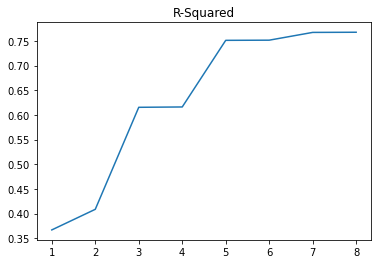

In [80]:
plot_performance(r2s, "R-Squared")

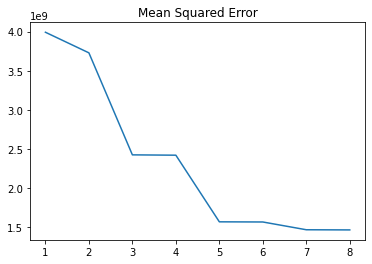

In [81]:
plot_performance(mses, "Mean Squared Error")

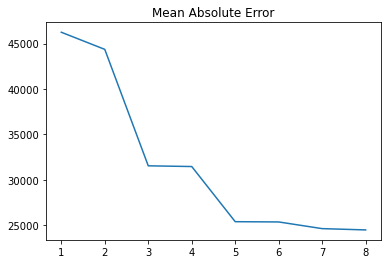

In [82]:
plot_performance(maes, "Mean Absolute Error")

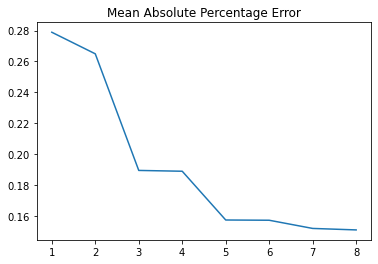

In [83]:
plot_performance(mapes, "Mean Absolute Percentage Error")